# Dialing in mismatch parameter to correctly assemble loci


**20170501**

I need to resolve this splitting loci problem - going to rerun ``ustacks`` using higher mismatch parameters given the number of mismatches I see in really similar sequences that my first run of the pipeline split into different loci. I'm going to do it on just a subset of the samples:

```
FG009	WA_Strait
FG001	WA_Strait
FG102_B	WA_SanJuans
FG100_B	WA_SanJuans
FG205	WA_Dabob
FG212	WA_Dabob
Q324	AK
Q314	AK
Q339	CA_Catalina
Q330	CA_Catalina
```

And, I'll do it with mismatch parameter values of 7, 10, and 13.


## Mismatch parameter 3
I used this parameter value in my first iteration of the Stacks pipeline, in this [notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/data_processing/CRAGIG_RUN1.ipynb).

#### ``ustacks``

I used my ``easy_ustacks`` script to run ``ustacks``, but outside of the notebook because it's interactive in the terminal.

In [3]:
cd /mnt/hgfs/SHARED_FOLDER/Git_repo/CRAGIG_run1/Scripts

/mnt/hgfs/SHARED_FOLDER/Git_repo/CRAGIG_run1/Scripts


In [5]:
!python easy_ustacks.py --help

usage: easy_ustacks.py [-h] -t TYPE -i INPUTDIR [-r] [-d] [-o OUT]
                       [-m MINDEPTH] [-M MAXDIS] [-p THREADS] [-x STARTID] -c
                       COUNT [-P POPMAP]

Write and call a ustacks shell script, and plot results

optional arguments:
  -h, --help            show this help message and exit
  -t TYPE, --type TYPE  input file type; supported types: fasta, fastq,
                        gzfasta, gzfastsq
  -i INPUTDIR, --inputdir INPUTDIR
                        relative path to directory with samples for ustacks
  -r, --removal         enable the removal algorithm to drop highly-repetitive
                        stacks
  -d, --delever         enable the deleveraging algortih for resolving merged
                        tags
  -o OUT, --out OUT     output path to write results
  -m MINDEPTH, --mindepth MINDEPTH
                        minimum depth of coverage required to create a stack;
                        default 2
  -M MAXDIS, --maxdis MAXDIS
         

Running easy_ustacks looked like:
<br>

```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o .
./../../../WorkingFolder/Stacks_m3 -m 10 -M 3 -p 10 -c ustacks_loci_counts_m3_20170505.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt

```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m3 -p 10 -M 3 -r -d

```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loci_after_ustacks_m3_20170505.png?raw=true)

#### cstacks

I took the ustacks output from allowing 3 mismatches in ustacks, and now will run through cstacks with the same set of mismatch parameters (n = 3,7,10,13,16).

I ran it all together in a bash script:
```
stacks cstacks -b 103 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n3 -n 3 -p 10
stacks cstacks -b 107 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n7 -n 7 -p 10
stacks cstacks -b 110 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n10 -n 10 -p 10
stacks cstacks -b 113 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n13 -n 13 -p 10
stacks cstacks -b 116 -s Stacks_m3/FG009 -s Stacks_m3/FG001 -s Stacks_m3/FG102_B -s Stacks_m3/FG100_B -s Stacks_m3/FG205 -s Stacks_m3/FG212 -s Stacks_m3/Q324 -s Stacks_m3/Q314 -s Stacks_m3/Q339 -s Stacks_m3/Q330 -o Stacks_m3/n16 -n 16 -p 10
```

Find out retained loci in catalog to see effect of mismatches allowed

In [20]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n3

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n3


In [21]:
!grep --count --with-filename consensus batch_103.catalog.tags.tsv

batch_103.catalog.tags.tsv:127316


In [24]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n7

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n7


In [25]:
!grep --count --with-filename consensus batch_107.catalog.tags.tsv

batch_107.catalog.tags.tsv:107738


In [32]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n10

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n10


In [34]:
!grep --count --with-filename consensus batch_110.catalog.tags.tsv

batch_110.catalog.tags.tsv:102860


In [35]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n13

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n13


In [ ]:
!grep --count --with-filename consensus batch_113.catalog.tags.tsv

In [ ]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_m3/n16

In [ ]:
!grep --count --with-filename consensus batch_116.catalog.tags.tsv

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
nvals = [3,7,10]
catalog_counts = [127316,107738,102860]

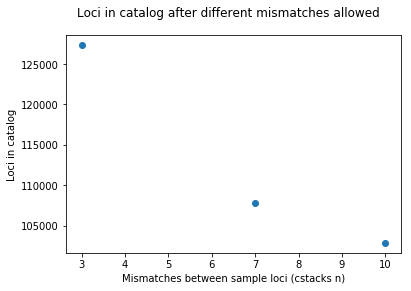

In [40]:
plt.scatter(nvals,catalog_counts)
plt.suptitle("Loci in catalog after different mismatches allowed")
plt.xlabel("Mismatches between sample loci (cstacks n)")
plt.ylabel("Loci in catalog")
plt.show()

## Mismatch parameter 7

#### ``ustacks``

Running easy_ustacks looked like:
<br>

```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o ../../../../WorkingFolder/Stacks_m7 -m 10 -M 7 -p 10 -c ustacks_loci_counts_20170503.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt
```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m7 -p 10 -M 7 -r -d

```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loc_after_ustacks_m7_20170503.png?raw=true)

## Mismatch parameter 10

#### ``ustacks``

Running easy_ustacks looked like:
<br>
```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o Stacks_m10 -m 10 -M 10 -p 10 -c ../../../../WorkingFolder/Stacks_m10/ustacks_loci_counts_20170501.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt

```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m10 -p 10 -M 10 -r -d 

```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loci_after_ustacks_m10_20170503.png?raw=true)

## Mismatch parameter 13

#### ``ustacks``

Running easy_ustacks looked like:
<br>

```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o .
./../../../WorkingFolder/Stacks_m13 -m 10 -M 13 -p 10 -c ustacks_loci_counts_m13_20170503.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt

```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m13 -p 10 -M 13 -r -d 
```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loci_after_ustacks_m13_20170505.png?raw=true)

## Mismatch parameter 16

#### ``ustacks``

Running easy_ustacks looked like:
<br>

```
$ python easy_ustacks.py -t fastq -i ../../../../WorkingFolder/Stacks -r -d -o .
./../../../WorkingFolder/Stacks_m16 -m 10 -M 16 -p 10 -c ustacks_loci_counts_m16_20170505.txt -P ../../../../WorkingFolder/popmap_cragigrun1_m10.txt

```

Example line of code from generated bash script:

```
stacks ustacks -f ../../../../WorkingFolder/Stacks/FG009.fq -i 0 -m 10 -t fastq -o ../../../../WorkingFolder/Stacks_m16 -p 10 -M 16 -r -d 
```
And the plot of retained ustacks loci looked like:

![image](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ret_loci_after_ustacks_m16_20170508.png?raw=true)

## Effect of ustacks ``M`` on number of retained loci after ustacks

**20170508**

In [4]:
cd /mnt/hgfs/SHARED_FOLDER

/mnt/hgfs/SHARED_FOLDER


In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ret_loci = open("m_and_ret_loci_20170508.csv","r")
lines = ret_loci.readlines()
ret_loci.close()

In [10]:
list_array = []
for line in lines:
    linelist = line.strip().split(",")
    list_array.append(linelist)

In [11]:
print list_array[1]

['FG001', '28888', '27512', '27274', '27224', '27211']


In [8]:
mvals = [3,7,10,13,16]

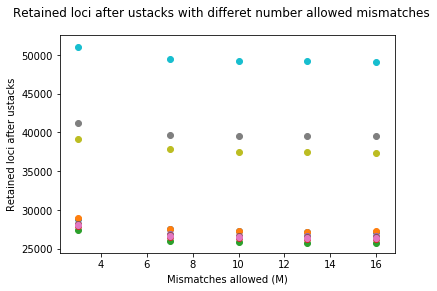

In [18]:
for line in list_array[1:]:
    sample = line[0]
    counts_ch = (line[1:])
    counts_int = []
    for count in counts_ch:
        int_count = int(count)
        counts_int.append(int_count)
    plt.scatter(mvals, counts_int)

plt.suptitle("Retained loci after ustacks with differet number allowed mismatches")  
plt.xlabel("Mismatches allowed (M)")
plt.ylabel("Retained loci after ustacks")
plt.show()

Wow. Almost no effect at all. Increasing the M parameter seems to almost not affect the number of retained loci after ustacks. The drop is just a couple hundred loci after M = 6.